# PROGRAM 28
### Aim  : Multiple regression
### Date : 26/10/2022
### By    : Anu C Scharia

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv('FuelConsumption.csv')
df.head()
df.info

<bound method DataFrame.info of       MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION

<AxesSubplot:>

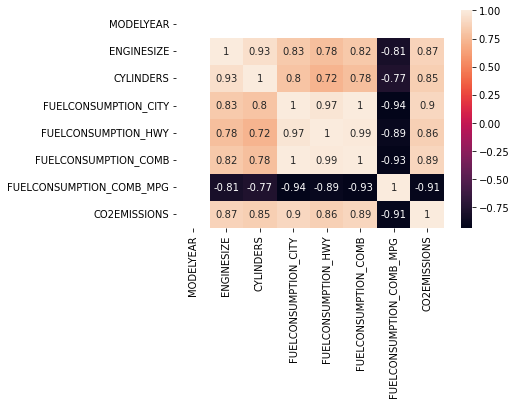

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [ ]:
x= cdf.iloc[:, :-1].values
y= cdf.iloc[:, -1].values
print(x)
print(y)

[[ 2.   4.   9.9  6.7  8.5]
 [ 2.4  4.  11.2  7.7  9.6]
 [ 1.5  4.   6.   5.8  5.9]
 ...
 [ 3.   6.  13.4  9.8 11.8]
 [ 3.2  6.  12.9  9.3 11.3]
 [ 3.2  6.  14.9 10.2 12.8]]
[196 221 136 ... 271 260 294]


<AxesSubplot:>

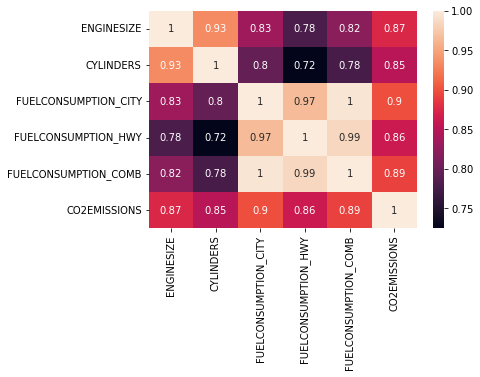

In [ ]:
sns.heatmap(cdf.corr(),annot=True)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=1)

In [ ]:
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_test_pred=regressor.predict(x_test)
y_train_pred=regressor.predict(x_train)

In [ ]:
print("Intersect :",regressor.intercept_)
print("Coffecients :",regressor.coef_)

Intersect : 67.61239058772759
Coffecients : [11.54382994  6.76843584 -5.55515389 -6.2638602  21.09978711]


In [ ]:
print("Residual sum squares : %.2f" % np.mean((y_test_pred-y_test)**2))

Residual sum squares : 567.73


In [ ]:
print("Testing : ",regressor.score(x_test,y_test))

Testing :  0.8684262550943238


In [ ]:
print("Training : ",regressor.score(x_train,y_train))

Training :  0.8616244046401831


Text(0.5, 1.0, 'Testing dataset')

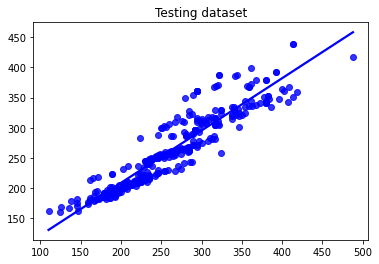

In [ ]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color="b")
plt.title("Testing dataset")

Text(0.5, 1.0, 'Training dataset')

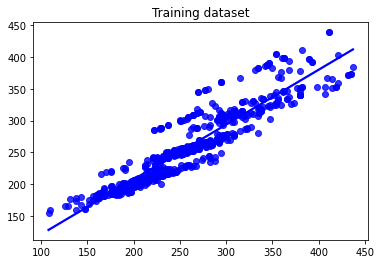

In [ ]:
sns.regplot(x=y_train,y=y_train_pred,ci=None,color="b")
plt.title("Training dataset")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

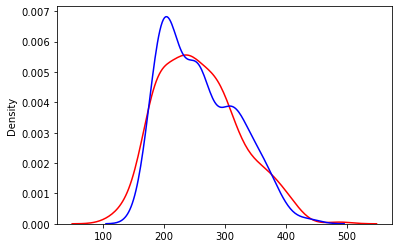

In [ ]:
ax1=sns.distplot(y_test,hist=False,color="r",label="Actual Value")
sns.distplot(y_test_pred,hist=False,color="b",label="Fitted Values",ax=ax1)

In [ ]:
x= cdf.iloc[:, :3].values
y= cdf.iloc[:, -1].values
print(x)
print(y)

[[ 2.   4.   9.9]
 [ 2.4  4.  11.2]
 [ 1.5  4.   6. ]
 ...
 [ 3.   6.  13.4]
 [ 3.2  6.  12.9]
 [ 3.2  6.  14.9]]
[196 221 136 ... 271 260 294]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 1/3,random_state=0)

In [ ]:
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred= regressor.predict(x_test)

In [ ]:
print("Testing : ",regressor.score(x_test,y_test))

Testing :  0.8418565610806696


In [ ]:
print("Training : ",regressor.score(x_train,y_train))

Training :  0.8710231041815493


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

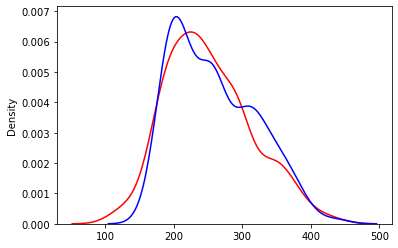

In [ ]:
ax1=sns.distplot(y_test,hist=False,color="r",label="Actual Value")
sns.distplot(y_test_pred,hist=False,color="b",label="Fitted Values",ax=ax1)

Testing :  0.7858531969002418
Training :  0.8143158005420086


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

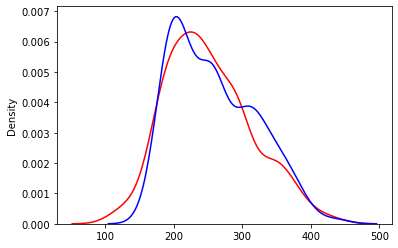

In [ ]:
x= df[["FUELCONSUMPTION_CITY"]].values
y= df[["CO2EMISSIONS"]].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 1/3,random_state=0)
regressor= LinearRegression()
regressor.fit(x_train, y_train)
y_pred= regressor.predict(x_test)
print("Testing : ",regressor.score(x_test,y_test))
print("Training : ",regressor.score(x_train,y_train))
ax1=sns.distplot(y_test,hist=False,color="r",label="Actual Value")
sns.distplot(y_test_pred,hist=False,color="b",label="Fitted Values",ax=ax1)